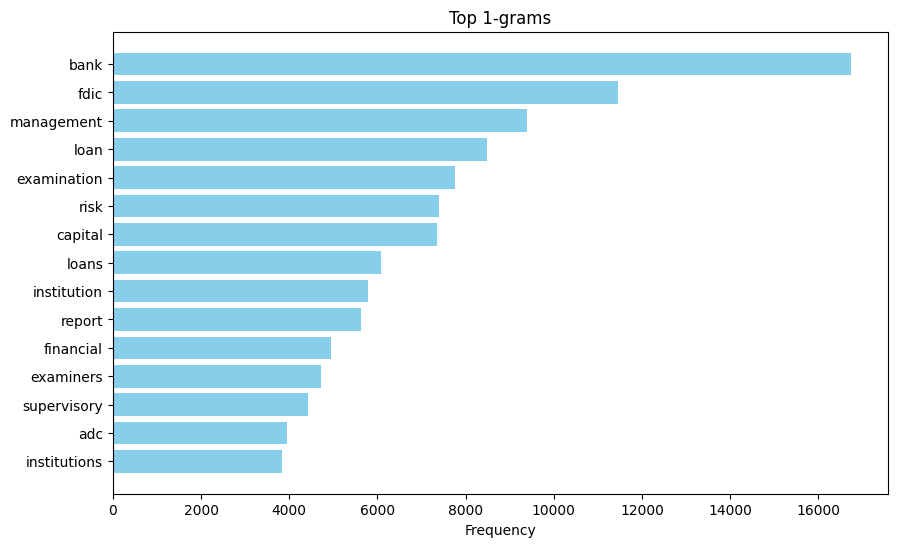

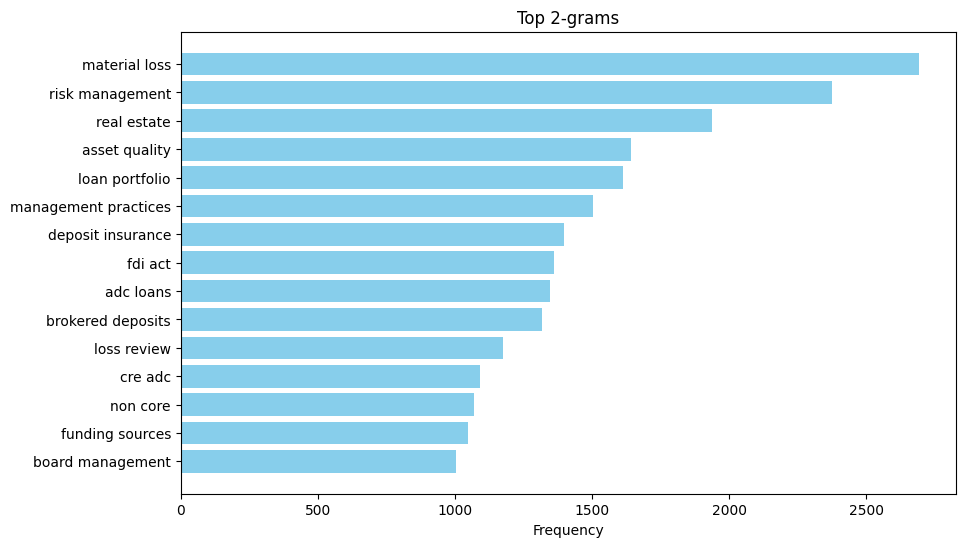

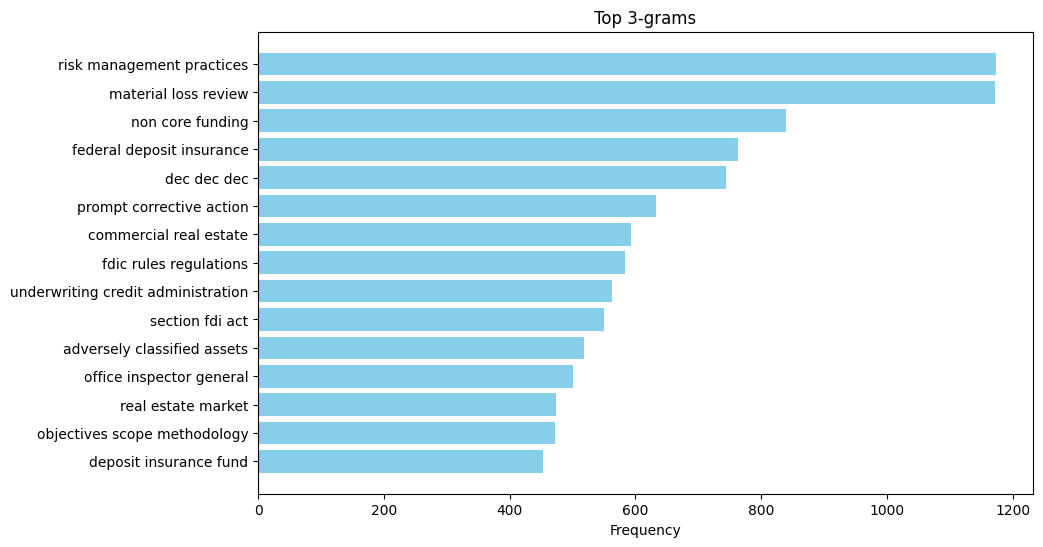

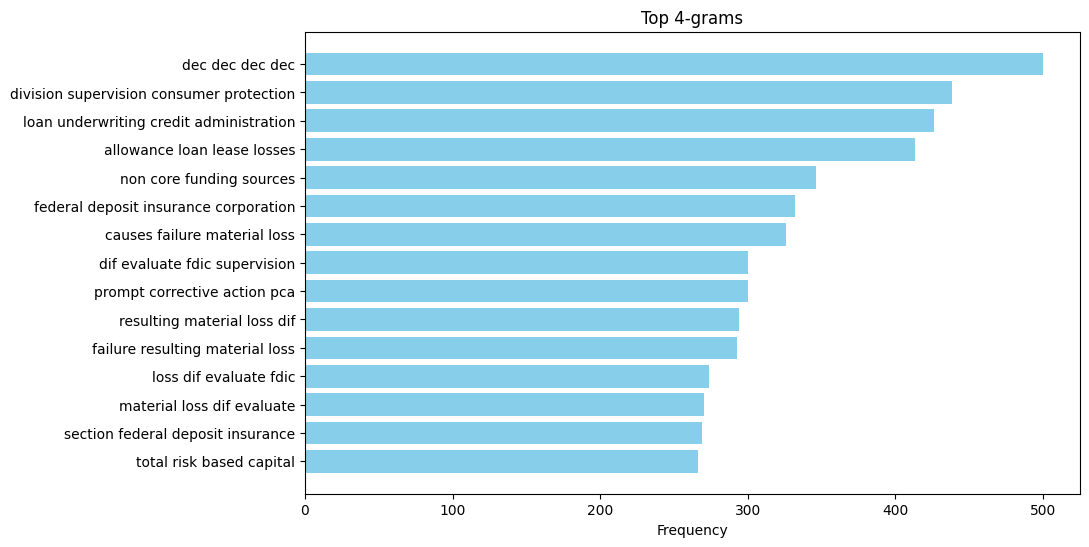

In [3]:
import re
from collections import Counter
from nltk import ngrams
import matplotlib.pyplot as plt

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing spaces
    return text

def get_ngrams(text, n):
    words = text.split()
    return list(ngrams(words, n))

def visualize_ngrams(ngrams_freq, title, top_n=10):
    top_ngrams = ngrams_freq.most_common(top_n)
    labels, counts = zip(*top_ngrams)
    labels = [' '.join(label) for label in labels]  # Join n-grams with spaces
    
    plt.figure(figsize=(10, 6))
    plt.barh(labels, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# File path
file_path = '../../data/txt/cleaned_contents.txt'  # Replace with your file path

# Main processing
text = preprocess_text(read_file(file_path))

# N-gram extraction
for n in range(1, 5):  # Unigrams to Qualgrams
    ngrams_list = get_ngrams(text, n)
    ngrams_freq = Counter(ngrams_list)
    visualize_ngrams(ngrams_freq, f'Top {n}-grams', top_n=15)